### VERY Important  : XOR

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # for reproducibility # 일체화

* Hyperparameters

In [0]:
learning_rate = 0.1 #속도 조절 
nb_epoch = 1000

* Dataset

In [0]:

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]

In [0]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [5]:
X = tf.placeholder(tf.float32, [None, 2]) 
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1') #랜덤노말_무작위, 완전무작위는 X
#연결하는 선의 개수 2,2 총 4개 2개가들어가서 2개나옴
b1 = tf.Variable(tf.random_normal([2]), name='bias1') 
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2') 
# 2개가들어가서 1개가 나옴 #히든레이어 #앞뒤의 개수를 맞추면 늘릴수있음
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2) #시그모이드 아래 그래프확인

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) #옵티마이저 문제품 수학적 계산 약소화

In [0]:
# Launch graph
sess = tf.Session()

In [0]:
# TensorFlow 변수들(variables) 초기화 (Initialization)
sess.run(tf.global_variables_initializer())

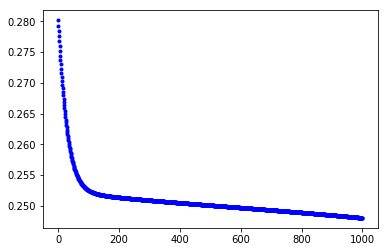

In [9]:
for i in range(nb_epoch+1):
    sess.run(train, feed_dict={X: x_data, Y: y_data}) #feed, 데이터들을 가져와서 먹여줌 그후 학습
    
    c1 = sess.run(cost, feed_dict={X: x_data, Y: y_data})
    plt.plot(i, c1, 'b.')
       


* **굵은 텍스트** HW : 위의 코드를 변형하여 XOR 학습시 얻어진 Cost 그래프를 그리시오. Hint : List 사용

In [10]:
print(sess.run(W1))

[[ 0.700714    0.6872502 ]
 [-1.4384938  -0.17821527]]


### Check the results

In [11]:
for i in range(4):
    x1 = x_data[[i], :]

    l1 = tf.sigmoid(tf.matmul(x1, W1) + b1)
    l2 = tf.sigmoid(tf.matmul(l1, W2) + b2)
    l2cast = tf.cast(l2 > 0.5, dtype=tf.float32)
    print( i, sess.run(l2))
    print( i, sess.run(l2), sess.run(l2cast), y_data[[i], :])   

0 [[0.5296087]]
0 [[0.5296087]] [[1.]] [[0.]]
1 [[0.45991224]]
1 [[0.45991224]] [[0.]] [[1.]]
2 [[0.54212976]]
2 [[0.54212976]] [[1.]] [[1.]]
3 [[0.45858246]]
3 [[0.45858246]] [[0.]] [[0.]]


### 참고 : Sigmoid

In [12]:
y1 = 1.0
y2 = sess.run(tf.sigmoid(y1))
print('{} --> {}'.format(y1, y2))

1.0 --> 0.7310585975646973


Sigmoid를 그려볼까요?

In [13]:
x1 = np.arange(-10,10, 0.5)
print(x1)

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]


In [14]:
y1 = sess.run(tf.sigmoid(x1))
print(y1)

[4.53978687e-05 7.48462275e-05 1.23394576e-04 2.03426978e-04
 3.35350130e-04 5.52778637e-04 9.11051194e-04 1.50118226e-03
 2.47262316e-03 4.07013772e-03 6.69285092e-03 1.09869426e-02
 1.79862100e-02 2.93122308e-02 4.74258732e-02 7.58581800e-02
 1.19202922e-01 1.82425524e-01 2.68941421e-01 3.77540669e-01
 5.00000000e-01 6.22459331e-01 7.31058579e-01 8.17574476e-01
 8.80797078e-01 9.24141820e-01 9.52574127e-01 9.70687769e-01
 9.82013790e-01 9.89013057e-01 9.93307149e-01 9.95929862e-01
 9.97527377e-01 9.98498818e-01 9.99088949e-01 9.99447221e-01
 9.99664650e-01 9.99796573e-01 9.99876605e-01 9.99925154e-01]


In [0]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sigmoid')

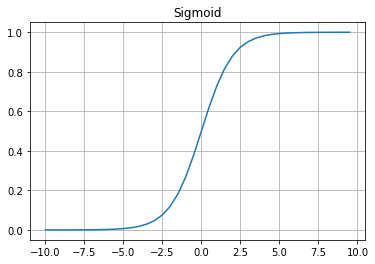

In [16]:
plt.plot(x1, y1)
plt.grid()
plt.title('Sigmoid') 
#자연계에서 자주보이는 곡선
#특징: 0을 넣으면 0.5를 넣음 아무리 큰,작은 수를 넣어도 0~1안의 값이 나옴
#용도: 0~1 값이 나와야하는 문제 해결시 사용